In [1]:
from pyspark.sql import SparkSession

In [2]:
# spark.stop()

In [3]:
spark = SparkSession. \
    builder. \
    appName("WebAalyticsApp"). \
    config("spark.ui.port", "0"). \
    getOrCreate()

In [4]:
spark

In [5]:
clicks_df = spark. \
            read. \
            parquet("/Users/akashpatel/Documents/Clairvoyant/dummy/data/")

In [7]:
clicks_df.show(truncate=False)

+----------------------+
|value                 |
+----------------------+
|{"x":"1648","y":"690"}|
|{"x":"1635","y":"685"}|
|{"x":"1626","y":"697"}|
|{"x":"1645","y":"701"}|
|{"x":"1643","y":"670"}|
|{"x":"1144","y":"439"}|
|{"x":"775","y":"224"} |
|{"x":"1645","y":"36"} |
|{"x":"1649","y":"37"} |
|{"x":"1645","y":"34"} |
|{"x":"1643","y":"55"} |
|{"x":"1637","y":"40"} |
|{"x":"831","y":"681"} |
|{"x":"831","y":"681"} |
|{"x":"831","y":"681"} |
|{"x":"831","y":"681"} |
|{"x":"831","y":"681"} |
|{"x":"805","y":"682"} |
|{"x":"871","y":"680"} |
|{"x":"839","y":"663"} |
+----------------------+
only showing top 20 rows



In [8]:
from pyspark.sql.functions import col, get_json_object

In [9]:
clicks_df = clicks_df. \
    withColumn("x", get_json_object(col("value"), "$.x").cast("long")). \
    withColumn("y", get_json_object(col("value"), "$.y").cast("long")). \
    drop("value")

In [10]:
clicks_df.printSchema()

root
 |-- x: long (nullable = true)
 |-- y: long (nullable = true)



In [11]:
from pyspark.sql.functions import min, max

clicks_df.agg({"x": "max"}).collect()

[Row(max(x)=1649)]

In [12]:
clicks_df.agg({"x": "min"}).collect()

[Row(min(x)=11)]

In [14]:
clicks_df.printSchema()
clicks_df.show(5)

root
 |-- x: long (nullable = true)
 |-- y: long (nullable = true)

+----+---+
|   x|  y|
+----+---+
|1648|690|
|1635|685|
|1626|697|
|1645|701|
|1643|670|
+----+---+
only showing top 5 rows



In [17]:
pandas_df = clicks_df.toPandas()

In [21]:
pandas_df["x"][:5]

0    1648
1    1635
2    1626
3    1645
4    1643
Name: x, dtype: int64


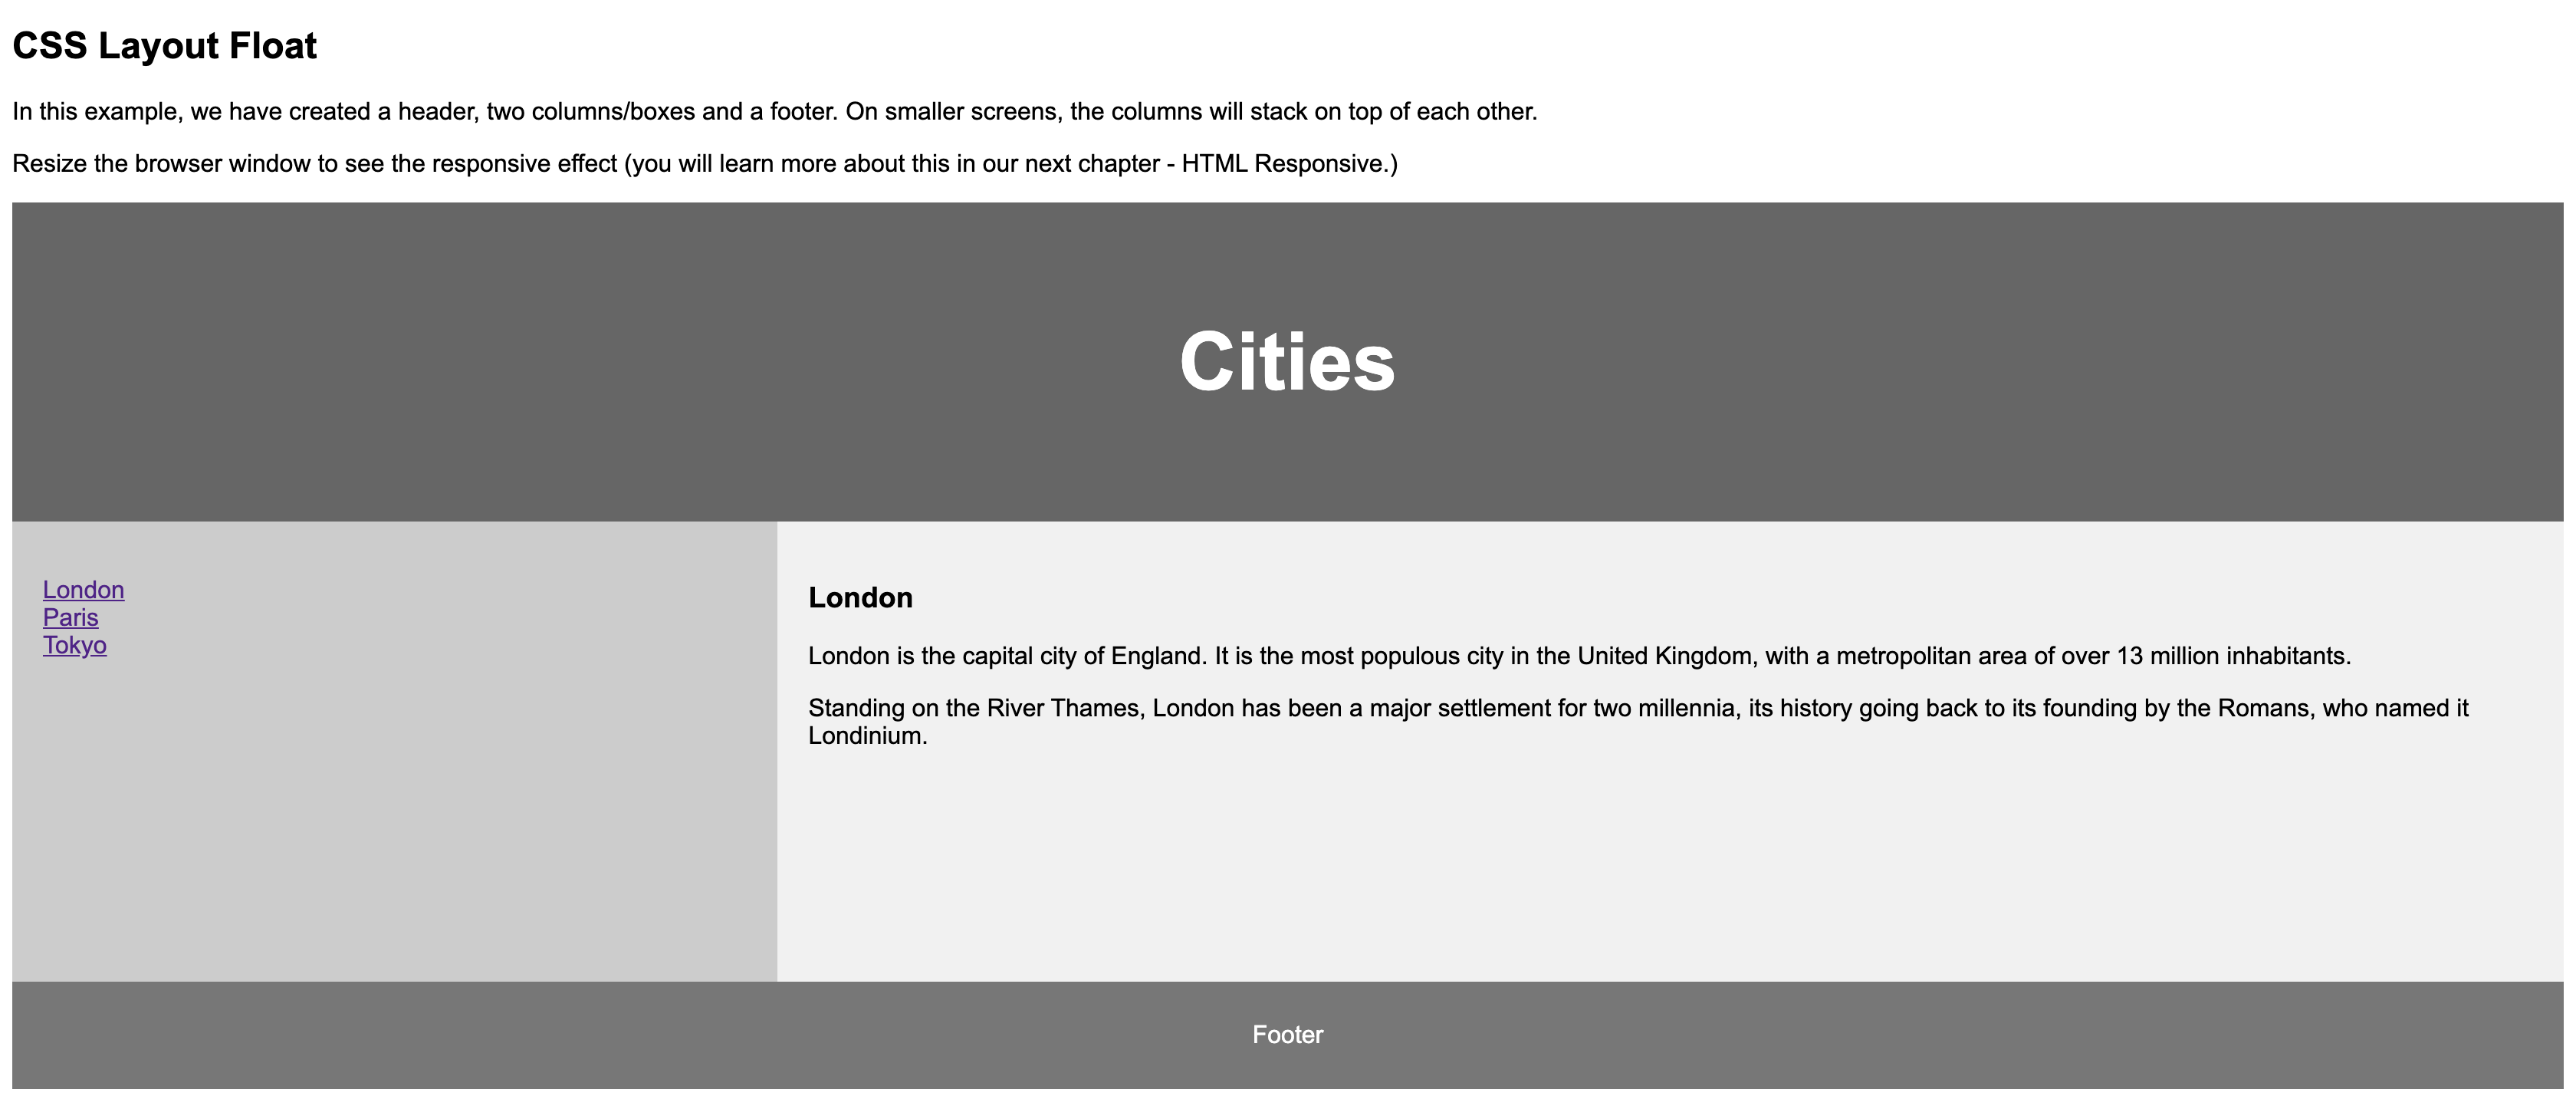

In [20]:
import plotly.express as px

fig = px.scatter( x=pandas_df["x"], y=pandas_df["y"])

fig.update_yaxes(autorange="reversed")

from PIL import Image
img = Image.open('/Users/akashpatel/Documents/Clairvoyant/ClickStreamWebAnalyticsConsumer/vizualization/nice.png')

fig.add_layout_image(
        dict(
            source=img,
            xref="x",
            yref="y",
            x=0,
            y=8,
            sizex=1680,
            sizey=713.94,
            sizing="stretch",
            opacity=0.6,
            layer="below"))


fig.update_layout(template="plotly_white")

fig.show()